<a href="https://colab.research.google.com/github/jeevaprakash-S/24ADI003_24BAD048/blob/main/ML_exp3_scenario1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
print("24BAD052")
print("Kalvi kannan B")


24BAD052
Kalvi kannan B


In [ ]:
df=pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
le = LabelEncoder()
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])


In [ ]:
df['final_score'] = (df['math score'] +
                     df['reading score'] +
                     df['writing score']) / 3

X = df[['parental level of education', 'test preparation course']]
y = df['final_score']


In [ ]:
X = X.fillna(X.mean())

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=10
)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MSE: 189.06095075662503
RMSE: 13.749943663761863
R2 Score: 0.05534956096749977


In [ ]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
})
print(coeff_df)


                       Feature  Coefficient
0  parental level of education    -1.387888
1      test preparation course    -3.697783


In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)


Ridge()

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)


Lasso(alpha=0.1)

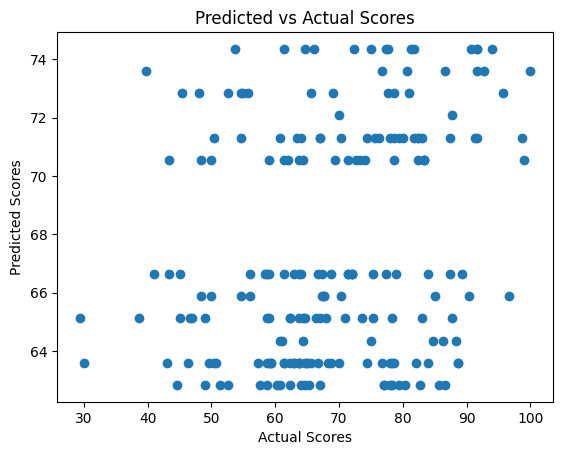

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Predicted vs Actual Scores")
plt.show()

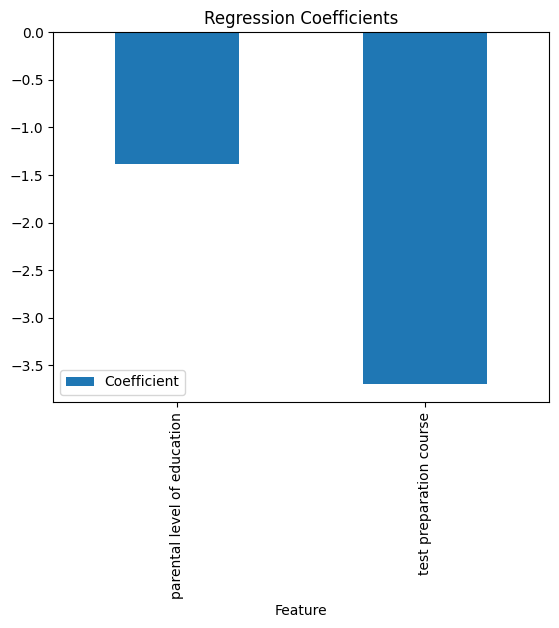

In [ ]:
coeff_df.set_index("Feature").plot(kind="bar")
plt.title("Regression Coefficients")
plt.show()



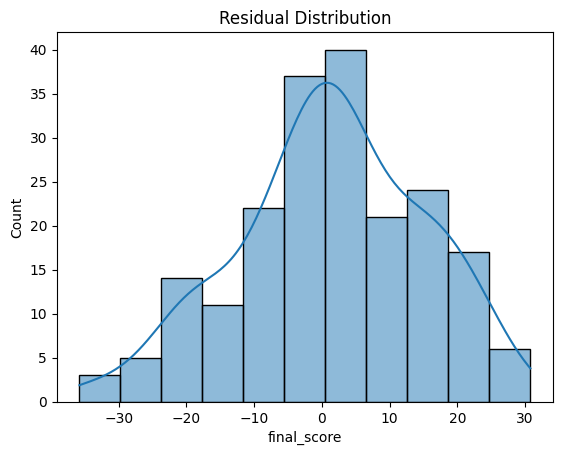

In [ ]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()
